In [1]:
import sys
sys.path.append('..')
print(sys.path)

['C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\adware\\Documents\\KISS', '', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\win32', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\Pythonwin', '..']


Updating component simulation capability

The average failure time is : 40.272
The mode failure time is: 28.0
the transition matrix is: 
 [[1.         0.         0.         0.         0.         0.        ]
 [0.12500087 0.87499912 0.         0.         0.         0.        ]
 [0.         0.12500087 0.87499912 0.         0.         0.        ]
 [0.         0.         0.12500087 0.87499912 0.         0.        ]
 [0.         0.         0.         0.12500087 0.87499912 0.        ]
 [0.         0.         0.         0.         0.12500087 0.87499912]]


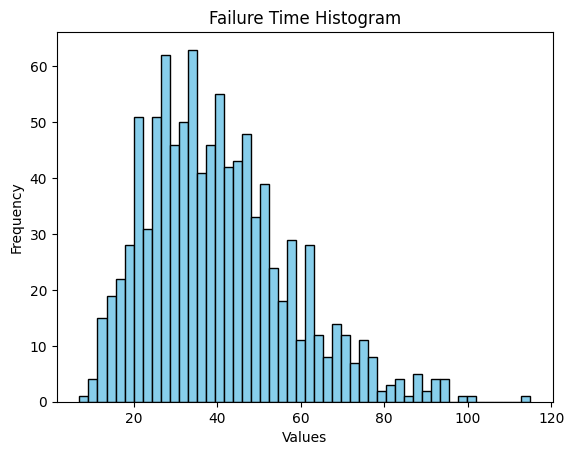

In [2]:
from shipClass.Component import Component
from utils.helperFunctions import find_mode

import numpy as np
import matplotlib.pyplot as plt
# ------------------------------------------------
states = {0: "failed",
          1: "degraded 4", 
          2: "degraded 3",
          3: "degraded 2",
          4: "degraded 1",
          5: "working" }
MTTF = 40
sim_time = 1000
num_comps= 1000
failure_times = np.zeros((num_comps))

# test 100 components and plot their MTTFs
for k in range(num_comps): 
    # create a component with desired mean time to failure (MTTF)
    component = Component(f"test_comp_{k+1}", states, MTTF)

    # run the simulation for a specified time
    for i in range(1, sim_time):
        component.simulate(1)

    # store the failure times to array
    failure_times[k]=component.grabFailureTime()

print(f'The average failure time is : {np.average(failure_times)}')
print(f'The mode failure time is: {find_mode(failure_times)}')
plt.hist(failure_times, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Failure Time Histogram')

print("the transition matrix is: \n", component.transition_matrix)



Generate a Reliability Curve from simulated Failures

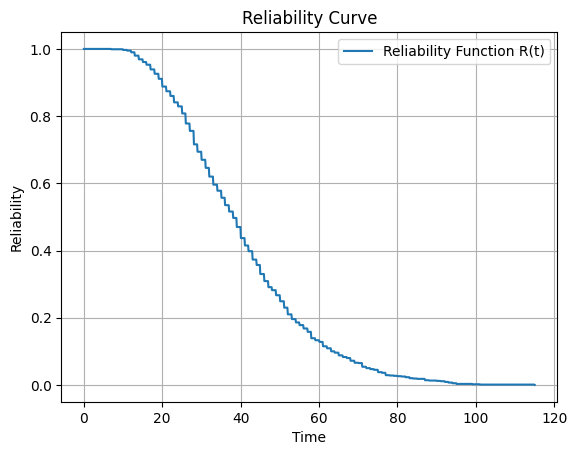

In [3]:
from utils.reliabilityFunctions import drawRelCurve
drawRelCurve(failure_times)

testing different betas

In [4]:
from shipClass.Component import Component
# from utils.helperFunctions import find_mode
from utils.reliabilityFunctions import drawRelCurve

import numpy as np
import matplotlib.pyplot as plt
# ------------------------------------------------
# testing parameters
betas= [0,1,2,4,20]
num_comps = 1000
sim_time = 1000
MTTF = 40
states = {0: "failed",
          1: "half power",
          2: "fully working"}
# states = {0: "failed",
#         1: "degraded 4",
#         2: "degraded 3",
#         3: "degraded 2",
#         4: "degraded 1",
#         5: "working" }

# simulation loop
failure_times = np.zeros((num_comps))
beta_max = 1
failure_t_max = 0
for beta in betas:
    print(f"Testing beta: {beta}")
    for k in range(num_comps):
        # create a component with desired mean time to failure (MTTF)
        component = Component(f"test_comp_{k+1}", states, MTTF)

        # create a Weibull-like transition matrix with the specified beta
        component.createWeibullLikeTransitionMatrix(beta=beta)

        # run the simulation for a specified time
        for i in range(1, sim_time):
            component.simulate(1)

        # store the failure times to array
        failure_times[k] = component.grabFailureTime()
    
    # determine which beta yields the highest failure time, track if this is consistent across runs
    if max(failure_times) > failure_t_max:
        failure_t_max = max(failure_times)
        beta_max = beta

    # Generate a Reliability Curve from simulated Failures
    print(f"MTTF = {np.mean(failure_times)}")
    print(f"standard deviation of the failure times is: {np.std(failure_times)}")
    # drawRelCurve(failure_times)

print(f"the max failure time of: {failure_t_max}, corresponds to beta: {beta_max}")

Testing beta: 0
MTTF = 39.943
standard deviation of the failure times is: 27.31823111037755
Testing beta: 1
MTTF = 40.463
standard deviation of the failure times is: 28.58927475470478
Testing beta: 2
MTTF = 40.679
standard deviation of the failure times is: 29.4081954393669
Testing beta: 4
MTTF = 39.718
standard deviation of the failure times is: 27.395592273210667
Testing beta: 20
MTTF = 41.274
standard deviation of the failure times is: 29.24214294472962
the max failure time of: 312.0, corresponds to beta: 20


### Modeling a Component as a Markov Chain

In [5]:
import numpy as np

from shipClass.Component import Component

# setup the component as a Markov Chain
states = {0: 'Failed',
          1: 'Degraded',
          2: 'Working'}

transition_mat = np.array([[1, 0, 0],
                           [0.02, 0.98, 0],
                           [0.02, 0.20, 0.78]])

c1 = Component("comp1", states, transition_mat)
c1.simulate(25)
c1.drawChain()
c1.plotHistory()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Modeling a Sensor as a Markov Chain

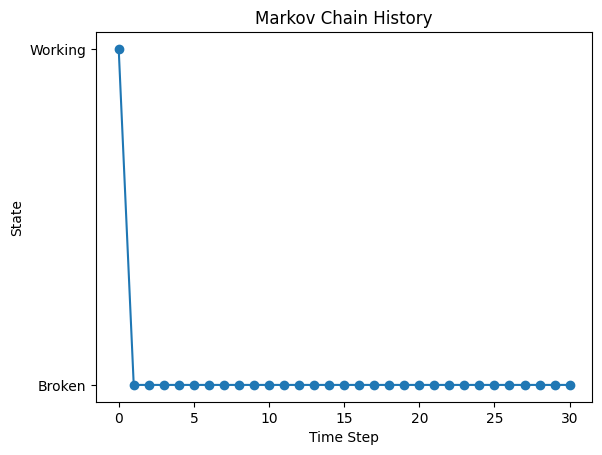

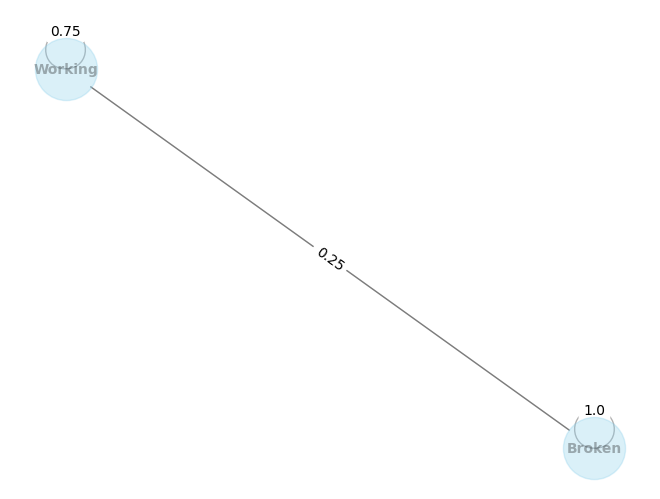

: 

: 

In [ ]:
import numpy as np

from shipClass.Sensor import Sensor

# setup the component as a Markov Chain
states = {0: 'Broken',
          1: 'Working'}

transition_mat = np.array([[1, 0], 
                           [0.25, 0.75]])

s1 = Sensor("comp1", states, transition_mat)
s1.simulate(30)
s1.plotHistory()
s1.drawChain()

In [ ]:
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp

import numpy as np

states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.25, 0.75]])
sensor_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])

c1 = Component("comp1", states, comp_transition_matrix)
s1 = Sensor("sensor1", states, sensor_transition_matrix)

sc1 = SensedComp(c1, s1)
sc1.simulate(10)
sc1.plotHistory()

ModuleNotFoundError: No module named 'shipClass'

: 

: 

# adding maintenance

In [ ]:
# testing sensedComponent with maintenance
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp
from Maintainer import Maintainer

import numpy as np

# initialize a sensed component
comp_states={0: 'Working', 1: 'Broken'}
comp_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
c1 = Component("comp1", comp_states, comp_transition_matrix)
sensor_states={0: 'Working', 1: 'Broken'}
sensor_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
s1 = Sensor("sensor1", sensor_states, sensor_transition_matrix)
sc1 = SensedComp(c1, s1)

# initialize a maintainer
maint_man = Maintainer()

# simulate the sensed component for n steps
num_steps = 100
while len(sc1.history) < num_steps:
    sc1.simulate(1)                 # simulate the markov chain
    sc1 = maint_man.diagnose(sc1)   # check if the part needs repair

    sc1 = maint_man.preventive_maintaince(sc1) # perform preventative maintenance if its scheduled

sc1.plotHistory()


ModuleNotFoundError: No module named 'Maintainer'

: 

: 

### Examining reliability behavior

In [ ]:
sim_sample_time = 1 # seconds
sim_time = 90       # days

# run the simulation
c1.run_simulation(sim_time, sim_sample_time)

# plot the results
c1.history.plot(title='Component History', xlabel='Time (days)', ylabel='State', legend=True)

: 

: 

plotting various shapes using stats originally

In [ ]:
betas = [0.2, 1.0, 5]
for beta in betas:
    comp = Component("Engine", shape=beta, scale= 20)

    comp.plotDistros()

: 

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from shipClass.Component import Component

# simulate 1000 components and determine the MTTF of the Markov Chains
num_comps = 1000
sim_time = 300

mean_failure_times = []
for i in range(num_comps): 
    comp = Component('Test_Component', 200)
    comp.simulate(sim_time)    
    mean_failure_times.append(comp.failure_times.mean())

# plot a reliability curve for a single component
plt.plot(comp.failure_times, comp.reliability_curve)

# print the mean time to failure of all tested comps
print("Mean Time to Failure: ", np.mean(mean_failure_times))
    

: 

: 